In [1]:
pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from neuralforecast import NeuralForecast
import pandas as pd
from neuralforecast.models import Informer
from neuralforecast.core import NeuralForecast
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import seaborn as sns
import os, psutil, time

In [29]:
df = pd.read_csv("/content/combined_dataset.csv")
df

,valid_time,pm1,pm10,pm2p5,bcaod550,aod550,omaod550,tcno2,tcso2,gtco3,tcco,u10,v10,d2m,t2m,sp,blh,tp,ssrd,city
0,2020-01-01 00:00:00,3.345133e-08,5.768080e-08,4.015858e-08,0.007324,0.325636,0.169562,0.000007,0.000004,0.005458,0.001034,-0.359210,0.270797,296.81027,297.75190,99084.750,107.451950,0.000400,1.539016e+05,Jakarta
1,2020-01-01 03:00:00,2.059538e-08,3.735071e-08,2.564554e-08,0.006835,0.349546,0.168343,0.000004,0.000005,0.005518,0.001016,0.884590,-0.294573,295.98276,297.98282,99184.310,557.089360,0.000466,7.752381e+05,Jakarta
2,2020-01-01 06:00:00,1.791439e-08,3.368978e-08,2.290612e-08,0.006645,0.341853,0.150293,0.000002,0.000004,0.005531,0.000990,0.906228,-0.244612,295.98886,299.19520,99048.560,445.996340,0.001658,7.483241e+05,Jakarta
3,2020-01-01 09:00:00,1.998871e-08,3.664903e-08,2.508832e-08,0.006841,0.399741,0.161010,0.000002,0.000004,0.005496,0.000973,-0.222746,0.717506,295.82938,299.81622,98837.810,248.201130,0.000577,6.134947e+05,Jakarta
4,2020-01-01 12:00:00,4.263052e-08,7.215669e-08,5.050946e-08,0.006944,0.342090,0.148887,0.000006,0.000004,0.005465,0.000983,-0.542103,-0.112552,296.41980,298.39337,99058.625,30.429886,0.000662,7.167915e+02,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43099,2024-11-30 09:00:00,9.770935e-08,1.613397e-07,1.143496e-07,0.024108,0.590681,0.377568,0.000006,0.000016,0.005727,0.001818,0.796195,-2.069528,282.28564,298.98267,98671.270,1041.326700,0.000000,1.951098e+06,Delhi
43100,2024-11-30 12:00:00,1.998515e-07,3.276284e-07,2.325008e-07,0.025710,0.627246,0.393695,0.000008,0.000017,0.005720,0.001857,2.042600,-1.776162,285.38733,294.98130,98567.600,75.574490,0.000000,1.667239e+05,Delhi
43101,2024-11-30 15:00:00,3.359677e-07,5.503197e-07,3.902109e-07,0.025986,0.645980,0.410317,0.000006,0.000016,0.005697,0.001881,2.276846,0.024371,284.59372,289.50815,98727.610,35.184097,0.000000,0.000000e+00,Delhi
43102,2024-11-30 18:00:00,2.725615e-07,4.481371e-07,3.173912e-07,0.023716,0.595244,0.387847,0.000007,0.000015,0.005670,0.001766,2.021152,-0.741631,283.81998,287.68220,98741.000,38.592712,0.000000,0.000000e+00,Delhi


In [30]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df = df.sort_values(['city', 'valid_time'])
df

,valid_time,pm1,pm10,pm2p5,bcaod550,aod550,omaod550,tcno2,tcso2,gtco3,tcco,u10,v10,d2m,t2m,sp,blh,tp,ssrd,city
28736,2020-01-01 00:00:00,4.418815e-07,7.284810e-07,5.139002e-07,0.032525,1.103517,0.703619,0.000009,0.000013,0.007293,0.001489,-1.301871,-1.199528,275.57272,275.85226,99283.016,29.858994,0.000000,0.00,Delhi
28737,2020-01-01 03:00:00,3.774994e-07,6.219930e-07,4.389606e-07,0.033152,1.181884,0.764707,0.000009,0.000010,0.007432,0.001505,-1.805397,-0.251212,275.82626,276.61030,99488.980,49.325516,0.000000,299959.20,Delhi
28738,2020-01-01 06:00:00,3.040885e-07,5.006687e-07,3.535407e-07,0.035487,1.002383,0.645593,0.000010,0.000008,0.007530,0.001493,-2.460891,0.606334,279.08060,286.94310,99600.400,361.242920,0.000000,2026422.00,Delhi
28739,2020-01-01 09:00:00,1.865138e-07,3.073680e-07,2.171263e-07,0.039818,1.004089,0.645432,0.000009,0.000010,0.007671,0.001538,-2.551396,0.307051,279.81920,291.13092,99338.460,529.400900,0.000000,1957012.00,Delhi
28740,2020-01-01 12:00:00,3.304355e-07,5.413034e-07,3.834064e-07,0.042619,1.021773,0.664210,0.000010,0.000012,0.007828,0.001592,-2.495460,-0.556712,282.44592,287.47230,99308.270,70.881910,0.000000,236553.19,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,2024-11-30 09:00:00,2.084368e-08,3.653594e-08,2.540561e-08,0.005993,0.242602,0.094446,0.000002,0.000003,0.005617,0.000712,2.219881,1.672781,297.33860,303.84674,98324.440,679.166500,0.000081,1202600.00,Jakarta
14364,2024-11-30 12:00:00,2.579644e-08,4.394113e-08,3.079297e-08,0.005549,0.195464,0.083607,0.000004,0.000003,0.005520,0.000698,1.767212,1.753837,295.66900,301.24283,98523.375,271.591920,0.000000,0.00,Jakarta
14365,2024-11-30 15:00:00,3.197417e-08,5.402592e-08,3.790952e-08,0.005358,0.217707,0.101088,0.000005,0.000004,0.005522,0.000714,1.438088,1.394578,296.18765,299.63150,98724.375,158.359400,0.000000,0.00,Jakarta
14366,2024-11-30 18:00:00,3.179606e-08,5.364091e-08,3.763267e-08,0.004535,0.187067,0.091728,0.000005,0.000004,0.005515,0.000709,1.931841,1.593387,296.32983,298.62442,98546.560,210.645200,0.000000,0.00,Jakarta


In [31]:
df['pm2p5'] *= 1e07
df = df.drop(columns=['pm1', 'pm10'], axis = 1)
df

,valid_time,pm2p5,bcaod550,aod550,omaod550,tcno2,tcso2,gtco3,tcco,u10,v10,d2m,t2m,sp,blh,tp,ssrd,city
28736,2020-01-01 00:00:00,5.139002,0.032525,1.103517,0.703619,0.000009,0.000013,0.007293,0.001489,-1.301871,-1.199528,275.57272,275.85226,99283.016,29.858994,0.000000,0.00,Delhi
28737,2020-01-01 03:00:00,4.389606,0.033152,1.181884,0.764707,0.000009,0.000010,0.007432,0.001505,-1.805397,-0.251212,275.82626,276.61030,99488.980,49.325516,0.000000,299959.20,Delhi
28738,2020-01-01 06:00:00,3.535407,0.035487,1.002383,0.645593,0.000010,0.000008,0.007530,0.001493,-2.460891,0.606334,279.08060,286.94310,99600.400,361.242920,0.000000,2026422.00,Delhi
28739,2020-01-01 09:00:00,2.171263,0.039818,1.004089,0.645432,0.000009,0.000010,0.007671,0.001538,-2.551396,0.307051,279.81920,291.13092,99338.460,529.400900,0.000000,1957012.00,Delhi
28740,2020-01-01 12:00:00,3.834064,0.042619,1.021773,0.664210,0.000010,0.000012,0.007828,0.001592,-2.495460,-0.556712,282.44592,287.47230,99308.270,70.881910,0.000000,236553.19,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,2024-11-30 09:00:00,0.254056,0.005993,0.242602,0.094446,0.000002,0.000003,0.005617,0.000712,2.219881,1.672781,297.33860,303.84674,98324.440,679.166500,0.000081,1202600.00,Jakarta
14364,2024-11-30 12:00:00,0.307930,0.005549,0.195464,0.083607,0.000004,0.000003,0.005520,0.000698,1.767212,1.753837,295.66900,301.24283,98523.375,271.591920,0.000000,0.00,Jakarta
14365,2024-11-30 15:00:00,0.379095,0.005358,0.217707,0.101088,0.000005,0.000004,0.005522,0.000714,1.438088,1.394578,296.18765,299.63150,98724.375,158.359400,0.000000,0.00,Jakarta
14366,2024-11-30 18:00:00,0.376327,0.004535,0.187067,0.091728,0.000005,0.000004,0.005515,0.000709,1.931841,1.593387,296.32983,298.62442,98546.560,210.645200,0.000000,0.00,Jakarta


In [32]:
forecast_start = pd.to_datetime("2024-11-29 00:00:00")
forecast_end   = pd.to_datetime("2024-11-30 09:00:00")
h = 12

In [33]:
forecast_horizon = h
exog_vars = ['bcaod550', 'omaod550', 'aod550', 'tcco', 'tcno2', 'gtco3', 'tcso2',
             'u10', 'v10', 'd2m', 't2m', 'sp', 'blh', 'tp', 'ssrd']

exog_forecasts = []

In [34]:
df = df.rename(columns={'valid_time': 'ds', 'city': 'unique_id', 'pm2p5': 'y'})

exogenous_cols = ['bcaod550', 'omaod550', 'aod550', 'tcco', 'tcno2', 'gtco3', 'tcso2', 'u10', 'v10', 'd2m', 't2m', 'sp', 'blh', 'tp', 'ssrd']

df = df[['unique_id', 'ds', 'y'] + exogenous_cols]

In [35]:
Y_train_df = df[df['ds'] < forecast_start]
Y_test_df = df[(df['ds'] >= forecast_start) & (df['ds'] <= forecast_end)]

In [36]:
for var in exog_vars:
    var_forecast_list = []

    for city in df['unique_id'].unique():
        city_df = df[(df['unique_id'] == city)].sort_values('ds')

        city_train = city_df[city_df['ds'] < forecast_start]

        model = ExponentialSmoothing(city_train[var], seasonal='add', seasonal_periods=8)
        fit = model.fit(optimized=True)

        forecast = fit.forecast(steps=h)
        forecast_dates = pd.date_range(start=forecast_start, periods=h, freq='3H')

        forecast_df = pd.DataFrame({
            'unique_id': city,
            'ds': forecast_dates,
            var: forecast.values
        })

        var_forecast_list.append(forecast_df)

    var_forecast_df = pd.concat(var_forecast_list)
    exog_forecasts.append(var_forecast_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipython-input-36-2870256391.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=forecast_start, periods=h, freq='3H')
/usr/

In [37]:
from functools import reduce
futr_exog_df = reduce(lambda left, right: pd.merge(left, right, on=['unique_id', 'ds'], how='outer'), exog_forecasts)

In [38]:
exog_forecasts

[   unique_id                  ds  bcaod550
 0      Delhi 2024-11-29 00:00:00  0.027358
 1      Delhi 2024-11-29 03:00:00  0.025693
 2      Delhi 2024-11-29 06:00:00  0.026125
 3      Delhi 2024-11-29 09:00:00  0.028186
 4      Delhi 2024-11-29 12:00:00  0.029903
 5      Delhi 2024-11-29 15:00:00  0.028552
 6      Delhi 2024-11-29 18:00:00  0.026345
 7      Delhi 2024-11-29 21:00:00  0.025104
 8      Delhi 2024-11-30 00:00:00  0.027358
 9      Delhi 2024-11-30 03:00:00  0.025693
 10     Delhi 2024-11-30 06:00:00  0.026125
 11     Delhi 2024-11-30 09:00:00  0.028186
 0   Helsinki 2024-11-29 00:00:00  0.001753
 1   Helsinki 2024-11-29 03:00:00  0.001625
 2   Helsinki 2024-11-29 06:00:00  0.001481
 3   Helsinki 2024-11-29 09:00:00  0.001387
 4   Helsinki 2024-11-29 12:00:00  0.001594
 5   Helsinki 2024-11-29 15:00:00  0.001517
 6   Helsinki 2024-11-29 18:00:00  0.001381
 7   Helsinki 2024-11-29 21:00:00  0.001353
 8   Helsinki 2024-11-30 00:00:00  0.001753
 9   Helsinki 2024-11-30 03:00:0

In [39]:
print("Test Set Dates by City:")
print(Y_test_df.groupby('unique_id')['ds'].agg(['min', 'max']))
print("\nForecasted Exogenous Variables:")
print(futr_exog_df.groupby('unique_id')['ds'].agg(['min', 'max']))

Test Set Dates by City:
                 min                 max
unique_id                               
Delhi     2024-11-29 2024-11-30 09:00:00
Helsinki  2024-11-29 2024-11-30 09:00:00
Jakarta   2024-11-29 2024-11-30 09:00:00

Forecasted Exogenous Variables:
                 min                 max
unique_id                               
Delhi     2024-11-29 2024-11-30 09:00:00
Helsinki  2024-11-29 2024-11-30 09:00:00
Jakarta   2024-11-29 2024-11-30 09:00:00


In [44]:
# def timestamp_split(df, h):
#     df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)
#     cutoffs = df.groupby('unique_id')['ds'].apply(lambda x: x.iloc[-h]).reset_index().rename(columns={'ds': 'cutoff'})
#     df = df.merge(cutoffs, on='unique_id')
#     df['is_test'] = df['ds'] >= df['cutoff']
#     train_df = df[df['is_test'] == False].drop(columns=['cutoff', 'is_test'])
#     test_df = df[df['is_test'] == True].drop(columns=['cutoff', 'is_test'])
#     return train_df, test_df

input_size = 36

# Y_train_df, Y_test_df = timestamp_split(df, h=h)

In [45]:
# Y_test_df

In [46]:
cols_to_scale = ['y'] + exogenous_cols
scalers = {}
for col in cols_to_scale:
    scaler = MinMaxScaler()
    Y_train_df[col] = scaler.fit_transform(Y_train_df[[col]])
    Y_test_df[col] = scaler.transform(Y_test_df[[col]])
    scalers[col] = scaler

/tmp/ipython-input-46-2983146137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train_df[col] = scaler.fit_transform(Y_train_df[[col]])
/tmp/ipython-input-46-2983146137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_df[col] = scaler.transform(Y_test_df[[col]])
/tmp/ipython-input-46-2983146137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [47]:
informer_test_df = Y_test_df.merge(futr_exog_df, on=['unique_id', 'ds'], how='left')

informer_test_df = informer_test_df.fillna(method='ffill')

/tmp/ipython-input-47-1169140539.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  informer_test_df = informer_test_df.fillna(method='ffill')


In [48]:
model = Informer(
    h=h,
    input_size=input_size,
    futr_exog_list=exog_vars,
    dropout=0.01,
    n_head=6,
    factor=4,
    encoder_layers=4,
    decoder_layers=1,
    max_steps=1500,
    batch_size=32,
)
nf = NeuralForecast(models=[model], freq='3H')

training_start = time.time()
nf.fit(df=Y_train_df)
training_end = time.time()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | enc_embedding | DataEmbedding | 2.3 K  | train
4 | dec_embedding | DataEmbedding | 2.3 K  | train
5 | encoder       | TransEncoder  | 444 K  | train
6 | decoder       | TransDecoder  | 139 K  | train
--------------------------------------------------------
588 K     Trainable params
0         Non-trainable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1500` reached.


In [50]:
future_df = nf.make_future_dataframe(df=Y_train_df)

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [51]:
fut_df = future_df.merge(Y_test_df, on=['unique_id', 'ds'], how='left')

In [52]:
fut_df = fut_df.fillna(fut_df.mean(numeric_only=True))

In [53]:
inference_start = time.time()
predict_df = nf.predict(futr_df=fut_df)
inference_end = time.time()

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [54]:
combined_df = Y_test_df.merge(predict_df, on=['unique_id', 'ds'])

In [55]:
combined_df = combined_df.rename(columns={'Informer': 'y_pred'})

In [56]:
MAE = mean_absolute_error(combined_df['y'], combined_df['y_pred'])
RMSE = root_mean_squared_error(combined_df['y'], combined_df['y_pred'])
R2 = r2_score(combined_df['y'], combined_df['y_pred'])
mape = mean_absolute_percentage_error(combined_df['y'], combined_df['y_pred'])

In [57]:
print("Informer Model Best MAE Score: ", MAE)
print("Informer Model Best RMSE Score: ", RMSE)
print("Informer Model Best R2 Score: ", R2)
print("Informer Model Best MAPE Score: ", mape)

Informer Model Best MAE Score:  0.025398224743141417
Informer Model Best RMSE Score:  0.04412159334862599
Informer Model Best R2 Score:  0.9666947199426015
Informer Model Best MAPE Score:  0.6912820245669979


In [58]:
baseline_mae = MAE
baseline_rmse = RMSE

In [59]:
feature_importance = []

for feature in exog_vars:
    print(f"Computing the Permutation Feature Importance for {feature}...")

    permuted_test_df = Y_test_df.copy()

    permuted_test_df[feature] = permuted_test_df.groupby('unique_id')[feature].transform(
        lambda x: np.random.permutation(x)
    )

    fut_df_perm = future_df.merge(permuted_test_df, on=['unique_id', 'ds'], how='left')
    fut_df_perm = fut_df_perm.fillna(fut_df_perm.mean(numeric_only=True))

    perm_predict_df = nf.predict(futr_df=fut_df_perm)

    perm_combined_df = Y_test_df.merge(perm_predict_df, on=['unique_id', 'ds'])
    perm_combined_df = perm_combined_df.rename(columns={'Informer': 'y_pred'})

    perm_mae = mean_absolute_error(perm_combined_df['y'], perm_combined_df['y_pred'])
    perm_rmse = root_mean_squared_error(perm_combined_df['y'], perm_combined_df['y_pred'])

    importance_mae = perm_mae - baseline_mae
    importance_rmse = perm_rmse - baseline_rmse

    feature_importance.append({
        'Feature': feature,
        'MAE Change': importance_mae,
        'RMSE Change': importance_rmse
    })


importances_df = pd.DataFrame(feature_importance)
importances_df = importances_df.sort_values(by='MAE Change', ascending=False)
print(importances_df)

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Computing the Permutation Feature Importance for bcaod550...


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Computing the Permutation Feature Importance for omaod550...


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for aod550...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for tcco...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for tcno2...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for gtco3...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for tcso2...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for u10...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for v10...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for d2m...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for t2m...

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for sp...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Computing the Permutation Feature Importance for blh...


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for tp...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Computing the Permutation Feature Importance for ssrd...


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

     Feature  MAE Change  RMSE Change
6      tcso2    0.001149     0.000821
1   omaod550    0.001097     0.000825
7        u10    0.001014     0.000712
3       tcco    0.000991     0.000933
8        v10    0.000875     0.000570
4      tcno2    0.000245     0.000159
14      ssrd    0.000154     0.000021
12       blh    0.000100     0.000149
2     aod550    0.000038    -0.000013
11        sp    0.000024     0.000015
9        d2m    0.000007    -0.000057
5      gtco3   -0.000004     0.000007
0   bcaod550   -0.000027    -0.000080
13        tp   -0.000029    -0.000011
10       t2m   -0.000485    -0.000245


In [60]:
top_10_importances = importances_df.sort_values(by='MAE Change', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_importances, x='MAE Change', y='Feature')
plt.xlabel("Importance")
plt.tight_layout()

plt.savefig("Informer_feature_importance.png", dpi=300, bbox_inches='tight')
plt.close()

In [61]:
from google.colab import files
files.download("Informer_feature_importance.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Addition
1. Extracting mean & standard deviation from RMSE
2. Extracting the RMSE score based on the city
3. Identify the training time and inference time of the Informer model
4. Identify the memory usage of the Informer model  

In [62]:
city_rmse = combined_df.groupby('unique_id').apply(
    lambda group: root_mean_squared_error(group['y'], group['y_pred'])
).reset_index(name='RMSE')

print(city_rmse)

  unique_id      RMSE
0     Delhi  0.074741
1  Helsinki  0.005335
2   Jakarta  0.015015


/tmp/ipython-input-62-766627552.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_rmse = combined_df.groupby('unique_id').apply(


In [63]:
combined_df

,unique_id,ds,y,bcaod550,omaod550,aod550,tcco,tcno2,gtco3,tcso2,u10,v10,d2m,t2m,sp,blh,tp,ssrd,y_pred
0,Delhi,2024-11-29 00:00:00,0.767336,0.250834,0.234174,0.217795,0.366724,0.229776,0.164515,0.488103,0.495064,0.457780,0.602279,0.476893,0.358843,0.000691,0.000000,0.000000,0.798478
1,Delhi,2024-11-29 03:00:00,0.781563,0.233317,0.212161,0.202587,0.353449,0.195687,0.169078,0.392565,0.467941,0.485154,0.617584,0.480266,0.383985,0.005564,0.000000,0.151010,0.658414
2,Delhi,2024-11-29 06:00:00,0.215693,0.239325,0.203945,0.195412,0.361202,0.341007,0.168427,0.385208,0.457827,0.462220,0.636687,0.641796,0.379730,0.158161,0.000000,0.603621,0.241407
3,Delhi,2024-11-29 09:00:00,0.152665,0.261962,0.207252,0.194176,0.372572,0.237169,0.163046,0.430270,0.462667,0.442008,0.604505,0.676034,0.348482,0.230497,0.000000,0.538599,0.144476
4,Delhi,2024-11-29 12:00:00,0.351267,0.276661,0.220506,0.214012,0.397762,0.297564,0.174097,0.499270,0.483819,0.420860,0.659963,0.628191,0.343229,0.007222,0.000000,0.045953,0.277822
5,Delhi,2024-11-29 15:00:00,0.608025,0.254204,0.203818,0.196775,0.397494,0.175034,0.175724,0.475281,0.497545,0.398089,0.641329,0.547000,0.356136,0.004033,0.000000,0.000000,0.490469
6,Delhi,2024-11-29 18:00:00,0.697532,0.217063,0.180094,0.170814,0.385099,0.148940,0.172960,0.455028,0.515202,0.435481,0.627340,0.521272,0.355993,0.001507,0.000000,0.000000,0.730375
7,Delhi,2024-11-29 21:00:00,0.569698,0.193384,0.175477,0.164093,0.393906,0.187648,0.164410,0.467605,0.533746,0.464956,0.610665,0.487827,0.345723,0.001710,0.000000,0.000000,0.527280
8,Delhi,2024-11-30 00:00:00,0.502391,0.237496,0.228229,0.212708,0.421237,0.272188,0.150852,0.477184,0.523008,0.430661,0.606672,0.460377,0.348648,0.004669,0.000000,0.000000,0.660981
9,Delhi,2024-11-30 03:00:00,0.461821,0.216408,0.214111,0.201484,0.453570,0.227491,0.157344,0.443530,0.520598,0.439053,0.613806,0.480077,0.367128,0.013785,0.000000,0.144749,0.477982


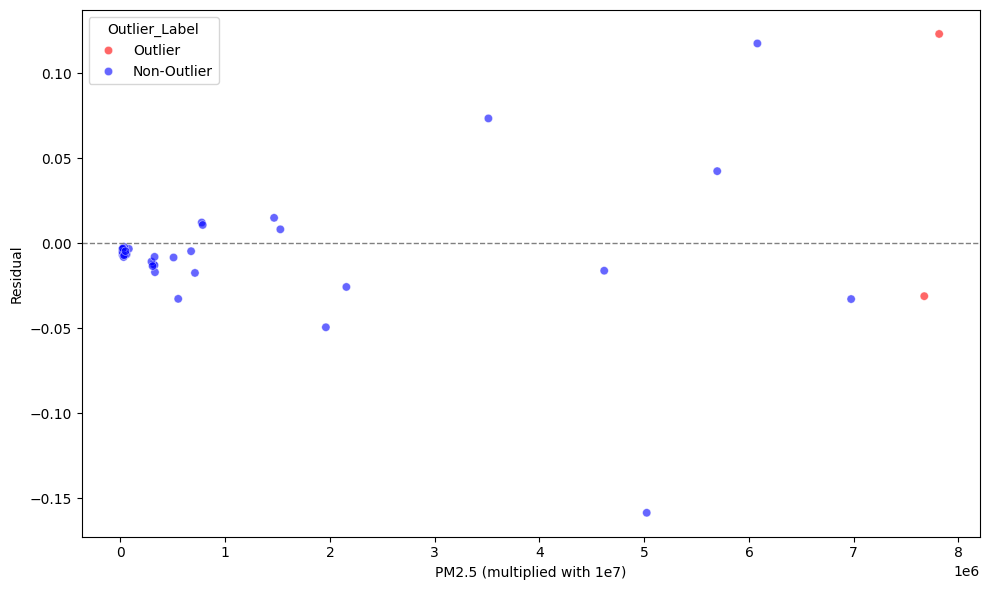

In [71]:
combined_df['residual'] = combined_df['y'] - combined_df['y_pred']
combined_df['y_plot'] = combined_df['y'] * 1e7

threshold_95 = combined_df['y'].quantile(0.95)
combined_df['Outlier_Label'] = np.where(combined_df['y'] >= threshold_95, 'Outlier', 'Non-Outlier')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='y_plot', y='residual', hue='Outlier_Label',
                palette={'Non-Outlier': 'blue', 'Outlier': 'red'}, alpha=0.6)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("PM2.5 (multiplied with 1e7)")
plt.ylabel("Residual")
plt.legend(title="Outlier_Label")
plt.tight_layout()
plt.savefig("Informer_Residual_Analysis.png", dpi=300, bbox_inches='tight')
# plt.show()

In [72]:
training_time = training_end - training_start
inference_time = inference_end - inference_start
memory = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2

In [73]:
print("Training Time (s): ", training_time)
print("Inference Time (s): ", inference_time)
print("Memory Used: ", memory)

Training Time (s):  239.6189980506897
Inference Time (s):  0.16121411323547363
Memory Used:  2601.40625


In [ ]:
nf.save(path='./nf_checkpoint/Informer/')

In [ ]:
!zip -r nf_checkpoint.zip nf_checkpoint/

  adding: nf_checkpoint/ (stored 0%)
  adding: nf_checkpoint/Informer/ (stored 0%)
  adding: nf_checkpoint/Informer/dataset.pkl (deflated 18%)
  adding: nf_checkpoint/Informer/Informer_0.ckpt (deflated 9%)
  adding: nf_checkpoint/Informer/configuration.pkl (deflated 76%)
  adding: nf_checkpoint/Informer/alias_to_model.pkl (deflated 27%)
